<a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![MAIA banner](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Aprendizaje_refuerzo_profundo_Banner_V1.png)

# <h1><center>Tarea Tutorial - Semana 2 <a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width="140" align="center"/></a></center></h1>

<center><h1>Predicción y Control On-Policy</h1></center>

En este notebook tutorial vas a aprender sobre algunas técnicas <i>on-policy</i> que existen para aproximar la función de valor en un problema de aprendizaje por refuerzo y algoritmos de aprendizaje on-policy. Mostraremos el funcionamiento de estas técnicas y algoritmos utilizando el ambiente de <a href="https://gymnasium.farama.org/environments/classic_control/mountain_car/">Mountain Car</a>, incluido en las librerías de Gym. La misión central de este notebook es evidenciar de forma visual cómo se puede representar matemáticamente un problema y cómo se estructura una solución cuando se utilizan técnicas <i>on-policy</i>. El tutorial se divide en:


# Tabla de Contenidos
1. [Objetivos de Aprendizaje](#scrollTo=Objetivos_de_Aprendizaje)  
2. [Marco Teórico](#scrollTo=Marco_Te_rico)  
3. [Instalación de Librerías](#scrollTo=Instalaci_n_de_Librer_as)  
4. [Familiarización con el Entorno de Gym](#scrollTo=Familiarizaci_n_con_el_Entorno_de_Gym)  
5. [Predicción on-policy](#scrollTo=Predicci_n_on_policy)  
6. [Control on-policy](#scrollTo=Control_on_policy)  
7. [Reflexiones Finales](#scrollTo=Reflexiones_Finales)  
8. [Referencias](#scrollTo=Referencias)

# Objetivos de Aprendizaje  
  
* Conocer algunas formas matemáticas que se utilizan para representar problemas complejos de aprendizaje por refuerzo.
* Familiarizarse con los entornos de simulación de Gym.
* Entrenar y validar algoritmos de aprendizaje por refuerzo <i>on-policy</i> con aproximación de funciones (Deep SARSA).



# Marco Teórico  

_-_

_-_

_-_

_-_


Ahora, es necesario redirigir estos conceptos detrás de la aproximación de una función de valor al problema de control de política, es decir, al aprendizaje. Primero, recordemos que en el proceso de control de política un algoritmo busca construir una aproximación de la función de valor de acción $\hat{q}(s,a,\mathbf{w}) \approx q_*(s,a)$, donde $\mathbf{w}$ es un vector de tamaño finito con los pesos que definen la aproximación que se utilice. [1]

Para el caso de tareas episódicas, la extensión de los métodos de predicción de semi-gradiente a las funciones de valor de acciones es directa: $\hat{q}(s,a,\mathbf{w}) \approx q_{\pi}(s,a)$. Después, si se acoplan esas predicciones con técnicas de mejoramiento de política y selección de acciones, obtenemos el control de política. En tareas con un espacio de acciones discreto y relativamente pequeño, para cada posible acción $a$ posible en el siguiente estado $S_{t+1}$, se puede calcular $\hat{q}(S_{t+1},a,\mathbf{w}_t) \approx q_{\pi}(s,a)$ y encontrar la acción <i>greedy</i> ($A^*_{t+1} = \text{arg max}_a
 \hat{q}(s,a,\mathbf{w}))$. Para <i>algoritmos on-policy</i>, la política se mejora cambiando la política de estimación a una aproximación <i>soft</i> (que puede escoger cualquier acción) de la política <i>greedy</i> (que únicamente escoge la mejor acción). [1]

 La siguiente es la regla de actualización de SARSA de un paso, y el pseudoalgoritmo correspondiente se muestra en la Figura 3:



 <center>  $\mathbf{w}_{t+1} = \mathbf{w}_{t+1} + \alpha [R_{t+1} + \gamma \hat{q}(S_{t+1},a,\mathbf{w}_t) - \hat{q}(S_{t+1},a,\mathbf{w}_t) ] \nabla \hat{q}(S_{t+1},a,\mathbf{w}_t)$  &emsp;&emsp;&emsp;$(1)$ </center>


![SARSAnn](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/SARSA_dF.png)


<center>Figura 3. Algoritmo de SARSA con aproximación de funciones para control de política.</center>


# Instalación de Librerías  

Ejecute los siguientes bloques de código para instalar e importar las librerías requeridas en el tutorial. Aquí se instalan versiones compatibles de <i>keras</i>, <i>tensorflow</i> y <i>Gymnasium</i> para poder realizar los entrenamientos de SARSA con redes neuronales. La primera ejecución puede demorar un par de minutos en finalizar. Si la segunda celda le da un error, pruebe volver a ejecutar la celda.

In [1]:
#Instala librerías
!pip install gymnasium #entorno de simulación
!pip install renderlab #libtería para renderizar

#importa librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

import renderlab #importa renderlab para videos
import gymnasium #importa gymnasium

#limpia registros
from IPython.display import clear_output
clear_output()
print("Todas las librerías han sido importadas correctamente.")

Todas las librerías han sido descargadas correctamente.


# Familiarización con el Entorno de Gym

El ambiente de Gym de <a href="https://gymnasium.farama.org/environments/classic_control/mountain_car/">Mountain Car</a> consiste de un carro atrapado en el fondo de un valle, y debe acelerar a la izquierda o a la derecha para intentar ganar el impulso suficiente para salir. Puede leer más detalladamente la documentación de este ambiente en los foros oficiales de Gymnasium.

![Observation_space_cartpole](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/Observation_space_mountaincar.png)

<center>Figura 5. Espacio de observación del ambiente de <i>Mountain Car</i>. [3]</center>

El espacio de estados del ambiente está definido en 2 dimensiones continuas, que definen la posición en el eje x y la velocidad del vehículo. Los límites de ambas variables puede observarse en la Figura 5. Por otra parte, el espacio de acciones consiste simplemente en 3 acciones discretas y determinísticas:

*   0: Acelera a la izquierda
*   1: No acelera
*   2: Acelera a la derecha

En este ambiente, el agente recibe una recompensa cuando alcanza una meta por fuera del valle, y por cada paso de tiempo que le toma alcanzarla recibe una recompensa negativa de -1. Si el auto llega a la meta (posición mayor a 0.5), el episodio se da por terminado, mientras que si el episodio supera los 200 pasos, se da por truncado; finalizando la simulación. Esto quiere decir que la peor recompensa posible será -200.


## Ejemplo

En esta sección se muestra un ejemplo de simulación de un episodio del <i>Mountain Car</i>. En este caso, el carro alterna acelerar a la izquierda y a la derecha en cada paso de tiempo.

In [ ]:
#Ejemplo de simulación de un episodio de Mountain Car
env_prueba_1 = gymnasium.make("MountainCar-v0", render_mode="rgb_array") #Se crea el ambiente. Para este tutorial, utilice gymnasium si va a renderizar.
env_prueba_1 = renderlab.RenderFrame(env_prueba_1, "./output") #Se crea una copia que se pueda renderizar con renderlab

obs , info = env_prueba_1.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 2 dimensiones)
terminated = False #Inicializa una condición para el loop
truncated = False #Inicializa una condición para el loop
total_reward=0 #Inicializa contador del retorno
action=0 #Inicializamos una variable de acción para alternar la selección

while not (terminated or truncated): #Simula hasta que el carro salga del valle o hasta que pasen 200 episodios

  #Decide una acción. En este caso alterna entre izquierda y derecha
  if(action==0):
    action=2
  else:
    action=0

  obs, reward, terminated, truncated , info = env_prueba_1.step(action) #Con la función step el ambiente da un paso. Se obtiene el estado, recompensa y banderas de información
  total_reward+=reward #Llevamos una cuenta de la recompensa total

print("Recompensa obtenida en el episodio:",total_reward) #Se imprime la recompensa obtenida
print("\n\n")

env_prueba_1.play() #Con esta función se obtiene el video de la simulación

Recompensa obtenida en el episodio: -200.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Puede observar que el retorno obtenido fue de -200, la peor recompensa posible. Alternar inmediatamente entre izquierda y derecha no es una estrategia útil.

## Ejercicio Práctico

Ahora, para comprobar el entendimiento y familiarización con el ambiente, intente por unos pocos minutos generar manualmente alguna estrategia para hacer que el carro logre salir del pozo (este será el problema que solucionaremos después con redes neuronales).

In [ ]:
# Genere alguna estrategia para intentar salir del pozo.

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

# Predicción on-policy




## Código de Tiles

In [9]:
"""
Tile Coding Software version 3.0beta
by Rich Sutton
based on a program created by Steph Schaeffer and others
External documentation and recommendations on the use of this code is available in the
reinforcement learning textbook by Sutton and Barto, and on the web.
These need to be understood before this code is.

This software is for Python 3 or more.

This is an implementation of grid-style tile codings, based originally on
the UNH CMAC code (see http://www.ece.unh.edu/robots/cmac.htm), but by now highly changed.
Here we provide a function, "tiles", that maps floating and integer
variables to a list of tiles, and a second function "tiles-wrap" that does the same while
wrapping some floats to provided widths (the lower wrap value is always 0).

The float variables will be gridded at unit intervals, so generalization
will be by approximately 1 in each direction, and any scaling will have
to be done externally before calling tiles.

Num-tilings should be a power of 2, e.g., 16. To make the offsetting work properly, it should
also be greater than or equal to four times the number of floats.

The first argument is either an index hash table of a given size (created by (make-iht size)),
an integer "size" (range of the indices from 0), or nil (for testing, indicating that the tile
coordinates are to be returned without being converted to indices).
"""

basehash = hash

class IHT:
    "Structure to handle collisions"
    def __init__(self, sizeval):
        self.size = sizeval
        self.overfullCount = 0
        self.dictionary = {}

    def __str__(self):
        "Prepares a string for printing whenever this object is printed"
        return "Collision table:" + \
               " size:" + str(self.size) + \
               " overfullCount:" + str(self.overfullCount) + \
               " dictionary:" + str(len(self.dictionary)) + " items"

    def count (self):
        return len(self.dictionary)

    def fullp (self):
        return len(self.dictionary) >= self.size

    def getindex (self, obj, readonly=False):
        d = self.dictionary
        if obj in d: return d[obj]
        elif readonly: return None
        size = self.size
        count = self.count()
        if count >= size:
            if self.overfullCount==0: print('IHT full, starting to allow collisions')
            self.overfullCount += 1
            return basehash(obj) % self.size
        else:
            d[obj] = count
            return count

def hashcoords(coordinates, m, readonly=False):
    if type(m)==IHT: return m.getindex(tuple(coordinates), readonly)
    if type(m)==int: return basehash(tuple(coordinates)) % m
    if m==None: return coordinates

from math import floor, log
from itertools import zip_longest

def tiles (ihtORsize, numtilings, floats, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q in qfloats:
            coords.append( (q + b) // numtilings )
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

def tileswrap (ihtORsize, numtilings, floats, wrapwidths, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints, wrapping some floats"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q, width in zip_longest(qfloats, wrapwidths):
            c = (q + b%numtilings) // numtilings
            coords.append(c%width if width else c)
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))

In [10]:
# Tile Coding Class
class MountainCarTileCoder:
    def __init__(self, iht_size=4096, num_tilings=8, num_tiles=8):
        """
        Initializes the MountainCar Tile Coder
        Initializers:
        iht_size -- int, the size of the index hash table, typically a power of 2
        num_tilings -- int, the number of tilings
        num_tiles -- int, the number of tiles. Here both the width and height of the
                     tile coder are the same
        Class Variables:
        self.iht -- tc.IHT, the index hash table that the tile coder will use
        self.num_tilings -- int, the number of tilings the tile coder will use
        self.num_tiles -- int, the number of tiles the tile coder will use
        """
        self.iht = IHT(iht_size)
        self.num_tilings = num_tilings
        self.num_tiles = num_tiles

    def get_tiles(self, position, velocity):
        """
        Takes in a position and velocity from the mountaincar environment
        and returns a numpy array of active tiles.

        Arguments:
        position -- float, the position of the agent between -1.2 and 0.5
        velocity -- float, the velocity of the agent between -0.07 and 0.07
        returns:
        array_tiles - np.array, active tiles
        """
        # Set the max and min of position and velocity to scale the input
        POSITION_MIN = -1.2
        POSITION_MAX = 0.6
        VELOCITY_MIN = -0.07
        VELOCITY_MAX = 0.07

        # Scale position and velocity by multiplying the inputs of each by their scale
        position_scale = self.num_tiles / (POSITION_MAX - POSITION_MIN)
        velocity_scale = self.num_tiles / (VELOCITY_MAX - VELOCITY_MIN)

        # Obtain active tiles for current position and velocity
        array_tiles = tiles(self.iht, self.num_tilings, [position * position_scale, velocity * velocity_scale])

        return np.array(array_tiles)

## Ejemplo de Uso

In [8]:
# Probamos la codificación en Tiles para el problema de Mountain Car
mctc = MountainCarTileCoder(iht_size = 1024, num_tilings = 8, num_tiles = 8)

# Revisamos la codificación para valores de posición y velocidad específicos
pos=-1
vel=0.01
array_tiles = mctc.get_tiles(position = pos, velocity = vel)
print(f"La codificación de Tiles para ({pos}, {vel}) es: {array_tiles}")

La codificación de Tiles para (-1, 0.01) es: [0 1 2 3 4 5 6 7]


# Control on-policy

En este apartado se busca utilizar la representación anteriormente vista del problema de Mountain Car en Tiles como una herramienta en el entrenamiento del algoritmo de SARSA.  Luego se busca revisar el efecto que tienen los cambios de hiperparámetros y visualizar la función de valor aproximada con este método.


## Código de SARSA

In [14]:
# SARSA
class SarsaAgent():

    def __init__(self, agent_info={}):
        # Inicialización del Agente

        # Variables para guardar registros en el entrenamiento
        self.last_action = None
        self.last_state = None
        self.previous_tiles = None

        # Creación de Tiles
        self.num_tilings = agent_info.get("num_tilings", 8)
        self.num_tiles = agent_info.get("num_tiles", 8)
        self.iht_size = agent_info.get("iht_size", 4096)
        self.num_actions = agent_info.get("num_actions", 3)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        # Initialize self.w to three times the iht_size. Recall this is because
        # we need to have one set of weights for each action (Stacked values).
        self.w = np.ones((self.num_actions, self.iht_size)) * self.initial_weights
        # Initialize self.mctc to the mountaincar verions of the  tile coder created
        self.mctc = MountainCarTileCoder(iht_size = self.iht_size,num_tilings = self.num_tilings,num_tiles = self.num_tiles)

        # Hiperparámetros de SARSA
        self.epsilon = agent_info.get("epsilon", 0.0)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.5) / self.num_tilings

    def select_action(self, tiles):
        #Escoge una acción con política epsilon greedy
        #INPUTS:
        #tiles: arreglo de numpy con las Tiles activas
        #OUTPUT:
        #(chosen_action, action_value): La acción escogida y su valor

        #Obtiene el valor de las acciones (q) para cada acción sumando por filas
        action_values = np.sum(self.w[:, tiles], axis = 1)

        #Selección Epsilon Greedy
        if np.random.random() < self.epsilon:
            chosen_action = np.random.randint(self.num_actions) #Con probabilidad epsilon, escoge al azar entre las acciones posibles
        else:
            chosen_action = np.argmax(action_values) #De lo contrario escoge la acción greedy (maximiza q)

        return chosen_action, action_values[chosen_action]

    def agent_start(self, state):
        #Escoge una primera acción para iniciar
        #INPUTS:
        #state: observación inicial
        #OUTPUTS:
        #self.last_action: acción seleccionada

        #Lee posición y velocidad del estado
        position, velocity = state

        #Obtiene las Tiles en el estado inicial
        active_tiles = self.mctc.get_tiles(position = position, velocity = velocity)
        #Escoge una acción y obtiene su valor con política epsilon-greedy
        current_action, action_value = self.select_action(active_tiles)

        #Salva la acción y Tiles
        self.last_action = current_action
        self.previous_tiles = np.copy(active_tiles)

        return self.last_action

    def agent_step(self, reward, state):
        #El agente da un paso. Observa una recompensa y un nuevo estado, y elige una acción.
        #INPUTS:
        #reward: recompensa vista en el último paso
        #state: nuevo estado
        #OUTPUTS:
        #self.last_action: acción seleccionada

        #Lee posición y velocidad del estado
        position, velocity = state

        #Obtiene las Tiles del nuevo estado
        active_tiles = self.mctc.get_tiles(position = position, velocity = velocity)
        #Escoge una acción y obtiene su valor con política epsilon-greedy
        current_action, action_value = self.select_action(active_tiles)

        #Target de la actualización
        target = reward + (self.gamma * action_value)
        #Obtiene el valor de la acción anterior
        last_action_val = np.sum(self.w[self.last_action][self.previous_tiles])

        #Tile Coding es una aproximación lineal de funciones,
        #entonces el gradiente de las Tiles activas es 1 (caso contrario, 0)
        grad = 1

        #Actualización de SARSA
        self.w[self.last_action][self.previous_tiles] = self.w[self.last_action][self.previous_tiles] + self.alpha * (target - last_action_val) * grad

        #Salva la acción y Tiles
        self.last_action = current_action
        self.previous_tiles = np.copy(active_tiles)

        return self.last_action

    def agent_end(self, reward):
        #Última actualización cuando se encuentra un estado terminal
        #INPUTS:
        #reward: última recompensa recibida

        #Target de la actualización
        target = reward
        #Obtiene el valor de la acción anterior
        last_action_val = np.sum(self.w[self.last_action][self.previous_tiles])

        #Tile Coding es una aproximación lineal de funciones,
        #entonces el gradiente de las Tiles activas es 1 (caso contrario, 0)
        grad = 1

        #Actualización de SARSA
        self.w[self.last_action][self.previous_tiles] = self.w[self.last_action][self.previous_tiles] + self.alpha * (target - last_action_val) * grad

    def return_action_value(self, state):
        #Obtiene el máximo de la aproximación q(s,a) para cierto estado
        #INPUTS:
        #state:
        #OUTPUTS:
        #max_action_value: max_a q(s,a)

        #Lee posición y velocidad del estado
        position, velocity = state

        #Obtiene las Tiles del estado
        active_tiles = self.mctc.get_tiles(position = position, velocity = velocity)
        #Obtiene el valor de las acciones (q) para cada acción sumando por filas
        action_values = np.sum(self.w[:, active_tiles], axis = 1)
        #Extrae el máximo por acciones
        max_action_value = np.max(action_values)

        return max_action_value

    def train(self, num_episodes):
      #Entrena el algoritmo de SARSA por num_episodes

      #Crea un ambiente de simulación
      env = gymnasium.make('MountainCar-v0')
      #Modifica la cantidad de máximos pasos por episodio a 1000 (original era 200)
      env._max_episode_steps = 1000
      #Lee un primer estado
      observation = env.reset()
      #Toma una primera acción para inicializar el agente
      last_action = agent.agent_start(observation[0])
      #Inicializa listas para pasos y retorno por episodio
      steps_per_episode = []
      rewards_per_episode = []

      #Este ciclo ejecuta todos los epidosios
      for t in range(num_episodes):
          #Inicia contador de pasos y retorno
          n_steps = 0
          rewards = 0
          #Inicializa banderas de terminación
          terminated = False
          truncated= False
          #Reinicia el ambiente
          observation = env.reset()
          #Se ejecuta hasta terminar un episodio
          while not (terminated or truncated):

              # Take a step with the environment
              obs, reward, terminated, truncated , info = env.step(last_action)
              # Number of steps the agent take to solve the challenge
              n_steps += 1
              # Accumulate reward
              rewards += reward

              # If the goal has been reached stop
              if terminated or truncated:
                  # Last step with the agent
                  agent.agent_end(reward)

              else:
                  # Take a step with the agent
                  last_action = agent.agent_step(reward, obs)

          # Save the amount of steps needed to complete the experiment
          # Without rebooting the agent
          steps_per_episode.append(n_steps)
          # Save the amount of award obtained at each episode
          rewards_per_episode.append(rewards)
      env.close()
      return (steps_per_episode,rewards_per_episode)

    def video(self):
      #Ejemplo de simulación de un episodio de Mountain Car
      env_render = gymnasium.make("MountainCar-v0", render_mode="rgb_array") #Se crea el ambiente. Para este tutorial, utilice gymnasium si va a renderizar.
      env_render = renderlab.RenderFrame(env_render, "./output") #Se crea una copia que se pueda renderizar con renderlab
      obs , info = env_render.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 2 dimensiones)
      terminated = False #Inicializa una condición para el loop
      truncated = False #Inicializa una condición para el loop
      total_reward=0 #Inicializa contador del retorno

      action = self.agent_start(obs)

      while not (terminated or truncated): #Simula hasta que el carro salga del valle o hasta que pasen 200 episodios

        obs, reward, terminated, truncated , info = env_render.step(action) #Con la función step el ambiente da un paso. Se obtiene el estado, recompensa y banderas de información
        total_reward+=reward #Llevamos una cuenta de la recompensa tota
        if not (terminated or truncated):
          action=self.agent_step(reward, obs)
        else:
          self.agent_end(reward)
      print("Recompensa obtenida en el episodio:",total_reward) #Se imprime la recompensa obtenida
      print("\n\n")

      env_render.play() #Con esta función se obtiene el video de la simulación

    def graph_q(self):
      pos_range = np.linspace(-1.2, 0.6, 50)
      vel_range = np.linspace(-0.07, 0.07, 50)
      pos_grid, vel_grid = np.meshgrid(pos_range, vel_range)
      Q_values = np.zeros_like(pos_grid)

      for i in range(pos_grid.shape[0]):
          for j in range(pos_grid.shape[1]):
              Q_values[i, j] = self.return_action_value([pos_grid[i, j], vel_grid[i, j]])


      fig = plt.figure(figsize=(10, 7))
      ax = fig.add_subplot(111, projection='3d')
      ax.plot_surface(pos_grid, vel_grid, -Q_values, cmap='viridis')
      ax.set_xlabel('Posición')
      ax.set_ylabel('Velocidad')
      ax.set_zlabel('-max_a q(s, a)')
      ax.set_title('-max_a q(s,a) SARSA')

      plt.show()



## Ejemplo

En este apartado ...


In [18]:
num_runs = 10
num_episodes = 500
agent_info_options = {"num_tilings": 8, "num_tiles": 8, "iht_size": 4096,
                      "epsilon": 0, "gamma": 1.0, "alpha": 0.5,
                      "initial_weights": 0.0, "num_actions": 3}

# Variable to store the amount of steps taken to solve the challeng
all_steps = []
# Variable to save the rewards in an episode
all_rewards = []


# Number of runs are the times the experiment will start again (a.k.a episode)
for n_runs in range(num_runs):

    agent = SarsaAgent(agent_info_options)
    steps_per_episode,rewards_per_episode=agent.train(num_episodes)
    # in all the Episodes
    all_steps.append(np.array(steps_per_episode))
    # Awards obtained in every episode
    all_rewards.append(np.array(rewards_per_episode))

#print(all_steps)
#print(all_rewards)



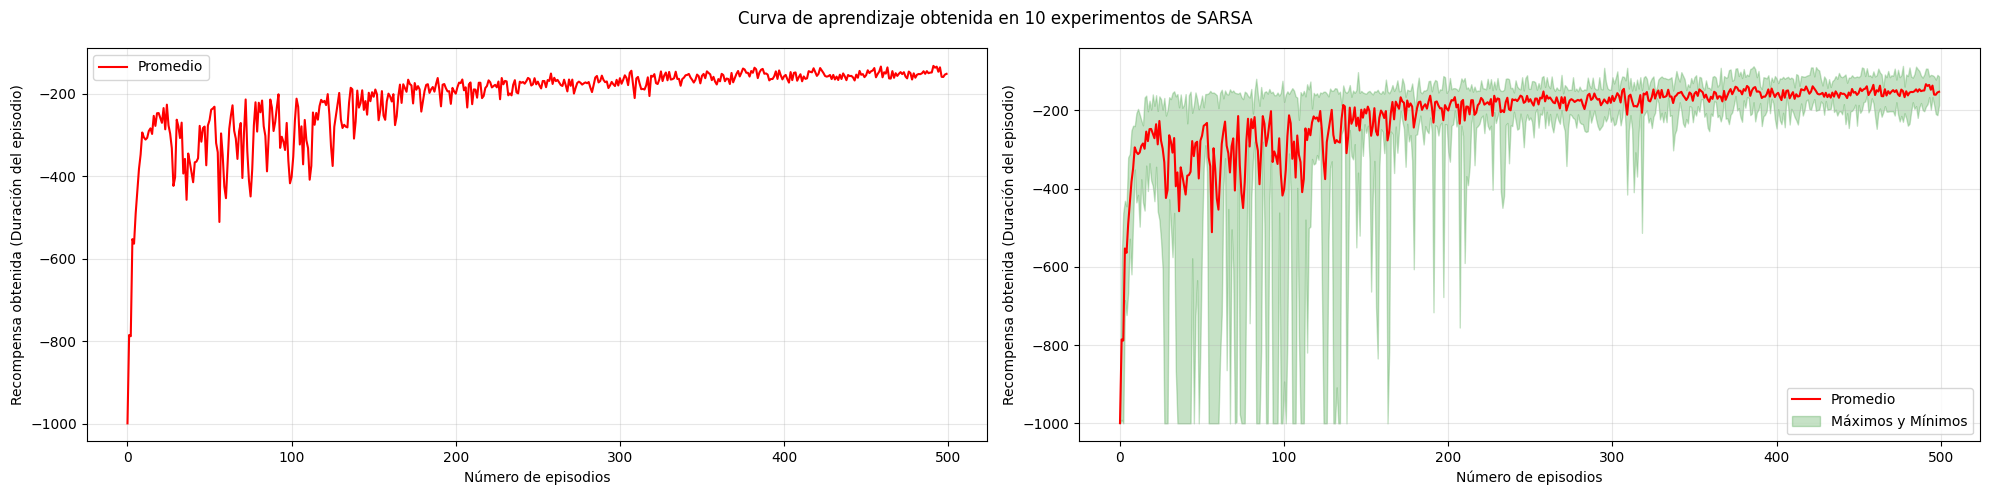

In [22]:
mean_rewards = np.mean(all_rewards, axis=0)  # Promedio por episodio
min_rewards = np.min(all_rewards, axis=0)  # Mínimo por episodio
max_rewards = np.max(all_rewards, axis=0)  # Máximo por episodio
episodes = np.arange(len(mean_rewards))  # Números de episodios


df = pd.DataFrame({"x": episodes, "min": min_rewards, "max": max_rewards})

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].grid(alpha=0.3)
axs[0].plot(episodes, mean_rewards, color='red', label="Promedio")
axs[0].set_ylabel('Recompensa obtenida (Duración del episodio)')
axs[0].set_xlabel('Número de episodios')
axs[0].legend()
axs[1].grid(alpha=0.3)
axs[1].plot(episodes, mean_rewards, color='red', label="Promedio")
axs[1].fill_between(df["x"], df["min"], df["max"], color='green', alpha=0.225, label="Máximos y Mínimos")
axs[1].set_ylabel('Recompensa obtenida (Duración del episodio)')
axs[1].set_xlabel('Número de episodios')
axs[1].legend()
number_of_experiments = len(all_rewards)
plt.suptitle(f"Curva de aprendizaje obtenida en {number_of_experiments} experimentos de SARSA")
plt.tight_layout()
plt.show()

In [20]:
agent.video()

Recompensa obtenida en el episodio: -200.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


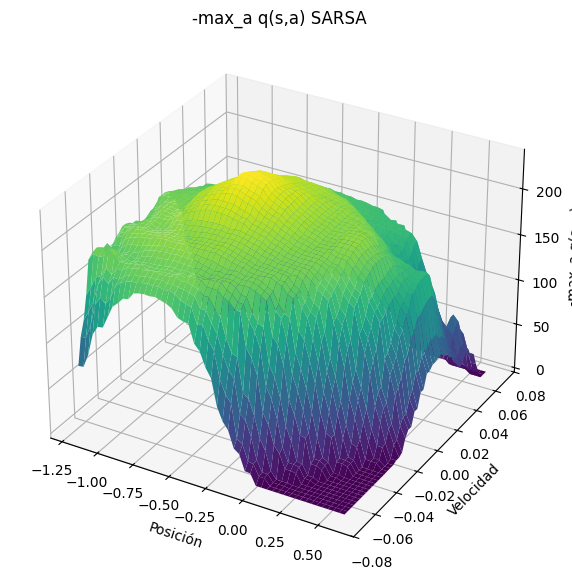

In [21]:
agent.graph_q()

# Reflexiones Finales



# Referencias

[1] Sutton, R. S. and Barto, A. G. (2018). Reinforcement Learning: An Introduction. The MIT Press, second edition.

[2] Gym Documentation, Mountain Car. `https://gymnasium.farama.org/environments/classic_control/mountain_car/`

[3] Sutton, R. S. Tile Coding Software -- Reference Manual, Version 3.0. Reinforcement Learning and Artificial Intelligence (RLAI). `http://incompleteideas.net/tiles/tiles3.html`


[4]